In [244]:
from plotly.offline import plot,iplot,init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [245]:
pd.options.display.max_rows=10

In [246]:
matches = pd.read_csv('IPL Matches 2008-2020.csv')

In [247]:
#Find the sum of duplicate
matches.duplicated().sum()

0

In [248]:
#Find the number of unique data in each column
matches.nunique()

id                 816
city                32
date               596
player_of_match    233
venue               36
                  ... 
result_margin       91
eliminator           2
method               1
umpire1             48
umpire2             47
Length: 17, dtype: int64

In [249]:
# checking null values in the data
matches.isna().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
                  ... 
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
Length: 17, dtype: int64

In [250]:
## in percentage
(matches.isna().sum())/(len(matches))*100

id                  0.000000
city                1.593137
date                0.000000
player_of_match     0.490196
venue               0.000000
                     ...    
result_margin       2.083333
eliminator          0.490196
method             97.671569
umpire1             0.000000
umpire2             0.000000
Length: 17, dtype: float64

In [251]:
##see descriptive analysis
matches.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [252]:
#checking nulls on region column
matches[matches.city.isnull().values]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
399,729281,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,1,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,N,NaN,Aleem Dar,S Ravi
402,729287,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,1,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,NaN,Aleem Dar,AK Chaudhary
403,729289,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,1,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Delhi Daredevils,wickets,4.0,N,NaN,Aleem Dar,VA Kulkarni
404,729291,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,1,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,N,NaN,BF Bowden,M Erasmus
406,729295,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,1,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,N,NaN,M Erasmus,S Ravi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,729303,NaN,2014-04-25,MM Sharma,Dubai International Cricket Stadium,1,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Chennai Super Kings,wickets,7.0,N,NaN,BF Bowden,M Erasmus
413,729309,NaN,2014-04-27,M Vijay,Sharjah Cricket Stadium,1,Delhi Daredevils,Mumbai Indians,Mumbai Indians,bat,Delhi Daredevils,wickets,6.0,N,NaN,Aleem Dar,VA Kulkarni
414,729311,NaN,2014-04-27,DR Smith,Sharjah Cricket Stadium,1,Sunrisers Hyderabad,Chennai Super Kings,Sunrisers Hyderabad,bat,Chennai Super Kings,wickets,5.0,N,NaN,AK Chaudhary,VA Kulkarni
415,729313,NaN,2014-04-28,Sandeep Sharma,Dubai International Cricket Stadium,1,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,field,Kings XI Punjab,wickets,5.0,N,NaN,BF Bowden,S Ravi


## Display only the matches get tie

In [253]:
#Extracting the table with match result='tie'
matches[matches.result=='tie']

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,1178426,Mumbai,2019-05-02,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,2020-09-20,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon
776,1216512,Abu Dhabi,2020-10-18,LH Ferguson,Sheikh Zayed Stadium,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kolkata Knight Riders,tie,NaN,Y,NaN,PG Pathak,S Ravi
781,1216517,Dubai,2020-10-18,KL Rahul,Dubai International Cricket Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel


In [254]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


## Getting the frequency of most "man of the match" awards

In [255]:
#Get the data for players got most "man of match" awards
matches['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

In [256]:
matches['player_of_match'].value_counts()[0:10]

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

In [257]:
#list with number of times players got "man of match" award
list(matches['player_of_match'].value_counts()[0:5])

[23, 22, 18, 17, 17]

In [258]:
#list of top 5 players got "man of match" award
list(matches['player_of_match'].value_counts()[0:5].keys())

['AB de Villiers', 'CH Gayle', 'RG Sharma', 'DA Warner', 'MS Dhoni']

## Plot a bar chart for values Player names Vs Number of matches get Player of match award.

In [259]:
import matplotlib.pyplot as plt

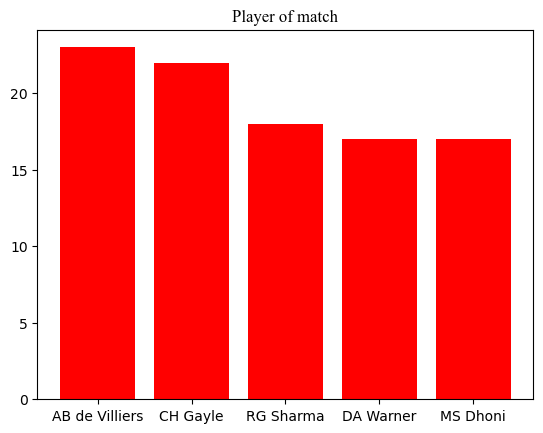

<Figure size 800x500 with 0 Axes>

In [260]:
plt.title('Player of match',fontname='Times New Roman')
plt.bar(list(matches['player_of_match'].value_counts()[0:5].keys()),list(matches['player_of_match'].value_counts()[0:5]),color="r")
plt.figure(figsize=(8,5))
plt.show()

In [261]:
matches['Winner'] = matches['result_margin'].astype(str)+'-'+matches['result']

In [262]:
matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,140.0-runs
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,33.0-runs
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,9.0-wickets
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,5.0-wickets
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,5.0-wickets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,nan-tie
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,57.0-runs
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi,6.0-wickets
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,17.0-runs


In [263]:
#Extracting the matches wins by "runs"
bat_first=matches[matches.result=='runs']

In [264]:
bat_first

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,140.0-runs
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,33.0-runs
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,6.0-runs
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba,66.0-runs
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,13.0-runs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,1216540,Sharjah,2020-10-12,AB de Villiers,Sharjah Cricket Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,runs,82.0,N,NaN,RK Illingworth,K Srinivasan,82.0-runs
806,1216542,Dubai,2020-10-08,JM Bairstow,Dubai International Cricket Stadium,0,Sunrisers Hyderabad,Kings XI Punjab,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,69.0,N,NaN,AK Chaudhary,Nitin Menon,69.0-runs
807,1216543,Dubai,2020-10-14,A Nortje,Dubai International Cricket Stadium,0,Delhi Capitals,Rajasthan Royals,Delhi Capitals,bat,Delhi Capitals,runs,13.0,N,NaN,AK Chaudhary,Nitin Menon,13.0-runs
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,57.0-runs


In [265]:
top_bat_first=bat_first.sort_values("result_margin",ascending=False)
top_bat_first.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,146.0-runs
560,980987,Bangalore,2016-05-14,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,Royal Challengers Bangalore,runs,144.0,N,NaN,AY Dandekar,VK Sharma,144.0-runs
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,140.0-runs
497,829785,Bangalore,2015-05-06,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,138.0,N,NaN,RK Illingworth,VA Kulkarni,138.0-runs
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,130.0,N,NaN,Aleem Dar,C Shamshuddin,130.0-runs


## making a histogram

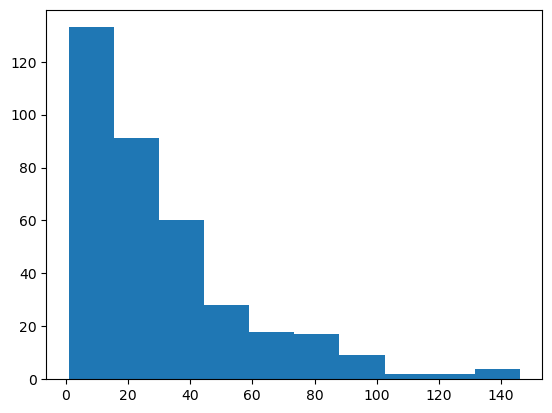

In [266]:
plt.hist(bat_first['result_margin'])
plt.show()

In [267]:
matches['year']=pd.DatetimeIndex(matches['date']).year
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,140.0-runs,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,33.0-runs,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,9.0-wickets,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,5.0-wickets,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,5.0-wickets,2008


In [268]:
#find the total match count and group it by year
match_season=matches.groupby(['year'])['id'].count().reset_index().rename(columns={'id':'match_count'})
match_season.style.background_gradient(cmap='BuGn')

,year,match_count
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


## Graph in plotly express for values "year" vs "Number of matches played"

In [269]:
import plotly
import plotly.express as px

In [270]:
colors = ['mediumblue',] * 13
colors[5] = 'crimson'
fig=px.bar(data_frame=match_season,x=match_season.year,y=match_season.match_count,labels=dict(x="year",y="match_count"),)
fig.update_layout(title="Number of matches played in different years ",
                  titlefont={'size': 26},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2.5, opacity=1,marker_color=colors)
fig.show()

## Graph in seaborn for values "Number of matches won" vs "Team name"

In [271]:
max_matches_won=matches['winner'].value_counts()

Text(0.5, 1.0, 'Number of times a team won the match')

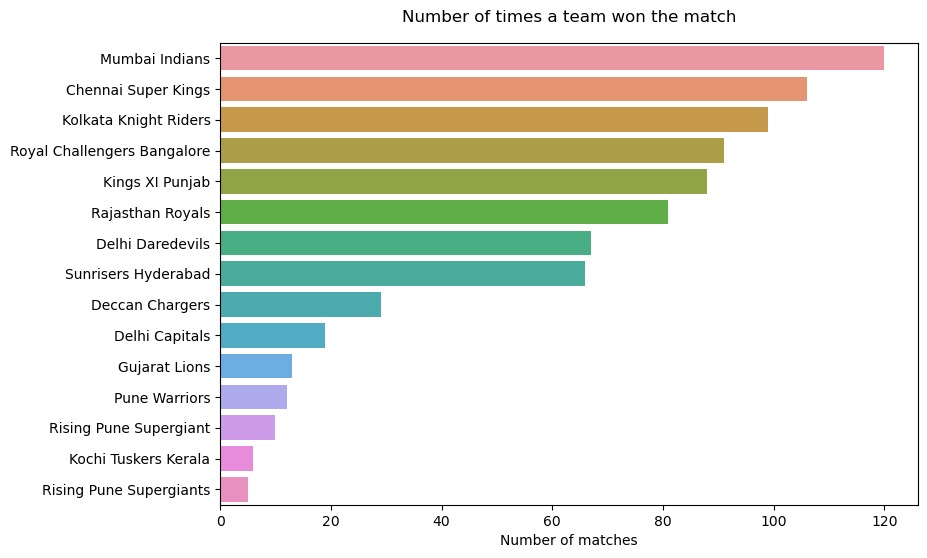

In [272]:
plt.figure(figsize=(9,6))
sns.barplot(x=max_matches_won,y=max_matches_won.keys())
plt.xlabel('Number of matches')
plt.title('Number of times a team won the match',pad=15)

## Pairplot in seaborn


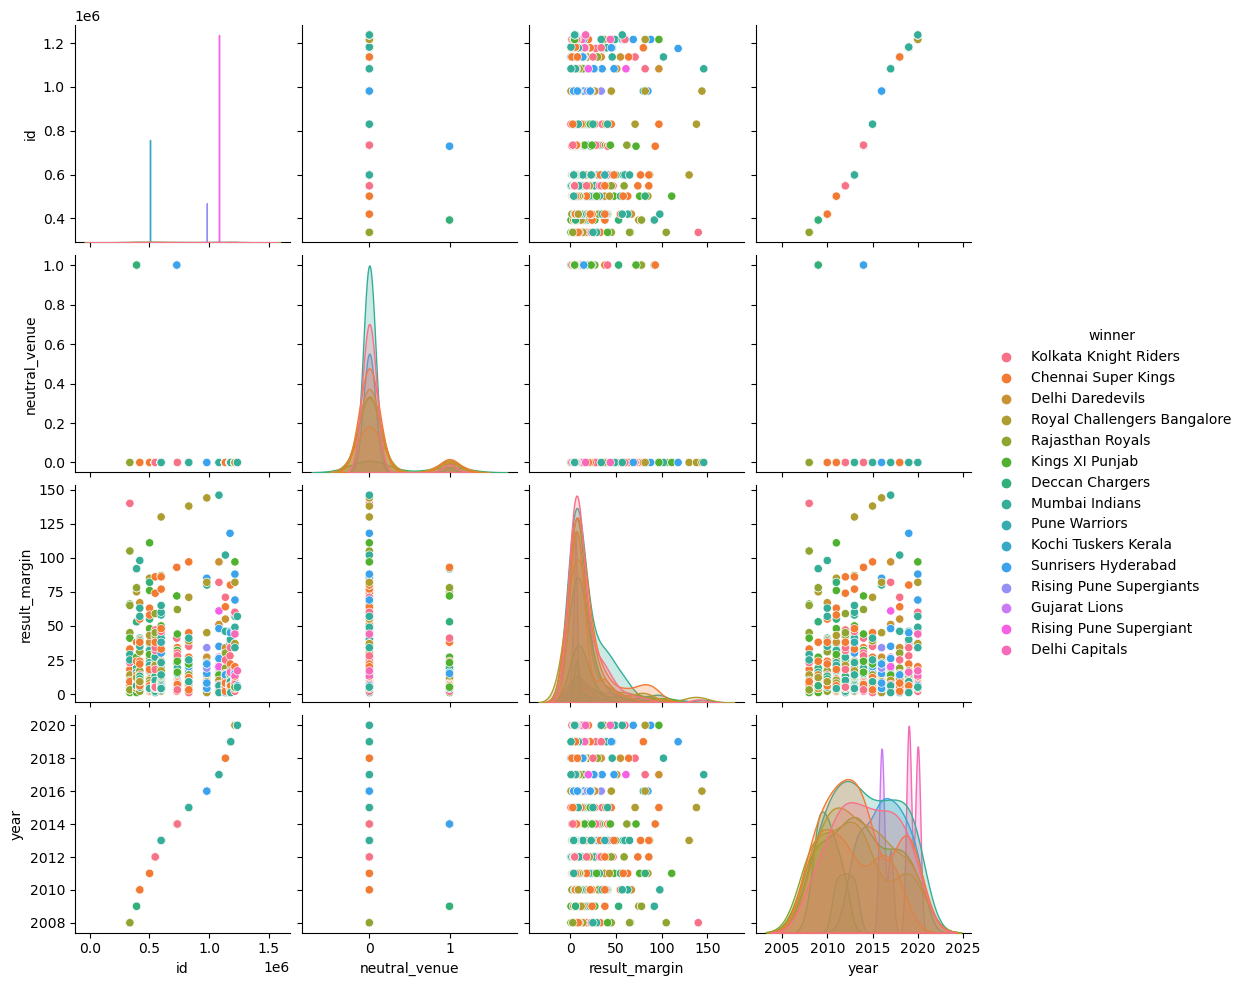

In [273]:
sns.pairplot(matches,hue='winner')

In [274]:
win = ['Chennai Super Kings']
win

['Chennai Super Kings']

In [275]:
match_won=matches['winner'].value_counts()

In [276]:
match_won

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
                              ... 
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, Length: 15, dtype: int64

In [277]:
matches['year']=pd.DatetimeIndex(matches['date']).year

In [278]:
matches['year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int64

In [279]:
# Extract the winner data and group it by year
matches_times = matches.groupby(['year','winner'])['id'].count().reset_index().rename(columns={'id':'win_times'})
matches_times

,year,winner,win_times
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
103,2020,Kolkata Knight Riders,7
104,2020,Mumbai Indians,11
105,2020,Rajasthan Royals,6
106,2020,Royal Challengers Bangalore,7


## Line Map in plotly for "years" vs "number of win times"

In [280]:
times = matches_times['winner'] == win[0]
px.line(matches_times[times], x='year', y='win_times',template='plotly_dark',color_discrete_sequence=['blue'])

In [281]:
## Extract the number of matches win by runs
bat_first=matches[matches.result=='runs']
bat_first.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,140.0-runs,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,33.0-runs,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,6.0-runs,2008
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba,66.0-runs,2008
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin,13.0-runs,2008


In [282]:
matches['year']=pd.DatetimeIndex(matches['date']).year

In [283]:
matches['year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int64

In [284]:
bat_first['winner'].value_counts()

Mumbai Indians                 62
Chennai Super Kings            53
Kolkata Knight Riders          41
Kings XI Punjab                40
Royal Challengers Bangalore    38
                               ..
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, Length: 15, dtype: int64

In [285]:
# Extract the number of matches win by runs and group it by year
run_times = bat_first.groupby(['year','winner'])['id'].count().reset_index().rename(columns={'id':'run_times'})
run_times

,year,winner,run_times
0,2008,Chennai Super Kings,5
1,2008,Delhi Daredevils,2
2,2008,Kings XI Punjab,5
3,2008,Kolkata Knight Riders,4
4,2008,Mumbai Indians,2
...,...,...,...
96,2020,Kolkata Knight Riders,5
97,2020,Mumbai Indians,5
98,2020,Rajasthan Royals,1
99,2020,Royal Challengers Bangalore,3


In [286]:
run_times_1 = run_times.rename(columns={'winner':'team1'})

In [287]:
run_times_1

,year,team1,run_times
0,2008,Chennai Super Kings,5
1,2008,Delhi Daredevils,2
2,2008,Kings XI Punjab,5
3,2008,Kolkata Knight Riders,4
4,2008,Mumbai Indians,2
...,...,...,...
96,2020,Kolkata Knight Riders,5
97,2020,Mumbai Indians,5
98,2020,Rajasthan Royals,1
99,2020,Royal Challengers Bangalore,3


## Bar graph for "years" vs "number of times won by run"

In [288]:
times_bat = run_times['winner'] == win[0]
px.bar(run_times[times_bat], x='year', y='run_times',template='plotly_dark',color_discrete_sequence=['yellow'])

In [289]:
## Extract the number of matches win by wickets
bowl_first = matches[matches.result=='wickets']
bowl_first.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner,year
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,9.0-wickets,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,5.0-wickets,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,5.0-wickets,2008
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,6.0-wickets,2008
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba,9.0-wickets,2008


In [290]:
matches['year']=pd.DatetimeIndex(matches['date']).year

In [291]:
matches['year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int64

In [292]:
bowl_first['winner'].value_counts()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Royal Challengers Bangalore    51
Rajasthan Royals               51
                               ..
Delhi Capitals                  8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, Length: 15, dtype: int64

In [293]:
## Extract the number of matches win by wickets and group it by year
bowl_times = bowl_first.groupby(['year','winner'])['id'].count().reset_index().rename(columns={'id':'win_bybowl'})
bowl_times

,year,winner,win_bybowl
0,2008,Chennai Super Kings,4
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,5
3,2008,Kings XI Punjab,5
4,2008,Kolkata Knight Riders,2
...,...,...,...
101,2020,Kolkata Knight Riders,1
102,2020,Mumbai Indians,6
103,2020,Rajasthan Royals,5
104,2020,Royal Challengers Bangalore,3


In [294]:
bowl_times_1 = bowl_times.rename(columns={'winner':'team1'})
bowl_times_1

,year,team1,win_bybowl
0,2008,Chennai Super Kings,4
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,5
3,2008,Kings XI Punjab,5
4,2008,Kolkata Knight Riders,2
...,...,...,...
101,2020,Kolkata Knight Riders,1
102,2020,Mumbai Indians,6
103,2020,Rajasthan Royals,5
104,2020,Royal Challengers Bangalore,3


## Tree map for "years" and "number of times win by bowl"

In [295]:
#import numpy as np
#win_bowl = px.data.gapminder().query("year == 2018")
win_bowl= bowl_times['winner'] == win[0]
fig = px.treemap(bowl_times[win_bowl], path=[px.Constant(win[0]), 'year', 'win_bybowl'],values='year',color='win_bybowl',hover_data=['year'],color_discrete_sequence=['turquoise'],color_continuous_scale='PuBu')
fig.update_traces(root_color="turquoise")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [296]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Winner,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,140.0-runs,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,33.0-runs,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,9.0-wickets,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,5.0-wickets,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,5.0-wickets,2008


In [297]:
matches['year']=pd.DatetimeIndex(matches['date']).year

In [298]:
matches['year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: year, dtype: int64

In [299]:
matches['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
                              ... 
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, Length: 15, dtype: int64

In [300]:
## Extract the number of matches win and group it by year
win_times = matches.groupby(['year','winner'])['id'].count().reset_index().rename(columns={'id':'winner_times'})
win_times

,year,winner,winner_times
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
103,2020,Kolkata Knight Riders,7
104,2020,Mumbai Indians,11
105,2020,Rajasthan Royals,6
106,2020,Royal Challengers Bangalore,7


In [301]:
matches['year'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
        ..
2020    60
2015    59
2017    59
2008    58
2009    57
Name: year, Length: 13, dtype: int64

In [302]:
# Extract the number of matches lost and group it by year
win_times_percent_1 = matches.groupby(['year','team2'])['id'].count().reset_index().rename(columns={'id':'winner_times_percent'})
win_times_percent_1

,year,team2,winner_times_percent
0,2008,Chennai Super Kings,7
1,2008,Deccan Chargers,7
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,8
4,2008,Kolkata Knight Riders,6
...,...,...,...
102,2020,Kolkata Knight Riders,4
103,2020,Mumbai Indians,7
104,2020,Rajasthan Royals,10
105,2020,Royal Challengers Bangalore,5


In [303]:
win_times_percent = matches.groupby(['year','team1'])['id'].count().reset_index().rename(columns={'id':'winner_times_percent_1'})
win_times_percent

,year,team1,winner_times_percent_1
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,7
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,7
4,2008,Kolkata Knight Riders,7
...,...,...,...
102,2020,Kolkata Knight Riders,10
103,2020,Mumbai Indians,9
104,2020,Rajasthan Royals,4
105,2020,Royal Challengers Bangalore,10


In [304]:
win_times_percent_1 = win_times_percent_1.rename(columns={'team2':'team1'})

In [305]:
win_times_percent_1

,year,team1,winner_times_percent
0,2008,Chennai Super Kings,7
1,2008,Deccan Chargers,7
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,8
4,2008,Kolkata Knight Riders,6
...,...,...,...
102,2020,Kolkata Knight Riders,4
103,2020,Mumbai Indians,7
104,2020,Rajasthan Royals,10
105,2020,Royal Challengers Bangalore,5


In [306]:
# merging win and lost details in a single table
wins=pd.merge(win_times_percent,win_times_percent_1)

In [307]:
wins

,year,team1,winner_times_percent_1,winner_times_percent
0,2008,Chennai Super Kings,9,7
1,2008,Deccan Chargers,7,7
2,2008,Delhi Daredevils,7,7
3,2008,Kings XI Punjab,7,8
4,2008,Kolkata Knight Riders,7,6
...,...,...,...,...
101,2020,Kolkata Knight Riders,10,4
102,2020,Mumbai Indians,9,7
103,2020,Rajasthan Royals,4,10
104,2020,Royal Challengers Bangalore,10,5


In [308]:
#finding the number of total matches by adding number of times win and number of times lost
wins['total'] = wins['winner_times_percent_1'] + wins['winner_times_percent']

In [309]:
wins

,year,team1,winner_times_percent_1,winner_times_percent,total
0,2008,Chennai Super Kings,9,7,16
1,2008,Deccan Chargers,7,7,14
2,2008,Delhi Daredevils,7,7,14
3,2008,Kings XI Punjab,7,8,15
4,2008,Kolkata Knight Riders,7,6,13
...,...,...,...,...,...
101,2020,Kolkata Knight Riders,10,4,14
102,2020,Mumbai Indians,9,7,16
103,2020,Rajasthan Royals,4,10,14
104,2020,Royal Challengers Bangalore,10,5,15


In [310]:
win_times

,year,winner,winner_times
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
103,2020,Kolkata Knight Riders,7
104,2020,Mumbai Indians,11
105,2020,Rajasthan Royals,6
106,2020,Royal Challengers Bangalore,7


In [311]:
win_2 = win_times.rename(columns={'winner':'team1'})
win_2

,year,team1,winner_times
0,2008,Chennai Super Kings,9
1,2008,Deccan Chargers,2
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,10
4,2008,Kolkata Knight Riders,6
...,...,...,...
103,2020,Kolkata Knight Riders,7
104,2020,Mumbai Indians,11
105,2020,Rajasthan Royals,6
106,2020,Royal Challengers Bangalore,7


In [312]:
#merging the value of number of times win and total with the previous table containing details of number of times wins, lost.
win_1=pd.merge(wins,win_2)

In [313]:
win_1

,year,team1,winner_times_percent_1,winner_times_percent,total,winner_times
0,2008,Chennai Super Kings,9,7,16,9
1,2008,Deccan Chargers,7,7,14,2
2,2008,Delhi Daredevils,7,7,14,7
3,2008,Kings XI Punjab,7,8,15,10
4,2008,Kolkata Knight Riders,7,6,13,6
...,...,...,...,...,...,...
101,2020,Kolkata Knight Riders,10,4,14,7
102,2020,Mumbai Indians,9,7,16,11
103,2020,Rajasthan Royals,4,10,14,6
104,2020,Royal Challengers Bangalore,10,5,15,7


In [314]:
# finding the number of times "win by wickets" by subtracting the values of "win by run" from "total"
win_1['loss'] = win_1['total'] - win_1['winner_times']

In [315]:
win_1

,year,team1,winner_times_percent_1,winner_times_percent,total,winner_times,loss
0,2008,Chennai Super Kings,9,7,16,9,7
1,2008,Deccan Chargers,7,7,14,2,12
2,2008,Delhi Daredevils,7,7,14,7,7
3,2008,Kings XI Punjab,7,8,15,10,5
4,2008,Kolkata Knight Riders,7,6,13,6,7
...,...,...,...,...,...,...,...
101,2020,Kolkata Knight Riders,10,4,14,7,7
102,2020,Mumbai Indians,9,7,16,11,5
103,2020,Rajasthan Royals,4,10,14,6,8
104,2020,Royal Challengers Bangalore,10,5,15,7,8


In [316]:
win_1.drop(['winner_times_percent_1','winner_times_percent'],axis=1)

,year,team1,total,winner_times,loss
0,2008,Chennai Super Kings,16,9,7
1,2008,Deccan Chargers,14,2,12
2,2008,Delhi Daredevils,14,7,7
3,2008,Kings XI Punjab,15,10,5
4,2008,Kolkata Knight Riders,13,6,7
...,...,...,...,...,...
101,2020,Kolkata Knight Riders,14,7,7
102,2020,Mumbai Indians,16,11,5
103,2020,Rajasthan Royals,14,6,8
104,2020,Royal Challengers Bangalore,15,7,8


In [317]:
win_3=win_1.drop(['total'],axis=1)
win_3

,year,team1,winner_times_percent_1,winner_times_percent,winner_times,loss
0,2008,Chennai Super Kings,9,7,9,7
1,2008,Deccan Chargers,7,7,2,12
2,2008,Delhi Daredevils,7,7,7,7
3,2008,Kings XI Punjab,7,8,10,5
4,2008,Kolkata Knight Riders,7,6,6,7
...,...,...,...,...,...,...
101,2020,Kolkata Knight Riders,10,4,7,7
102,2020,Mumbai Indians,9,7,11,5
103,2020,Rajasthan Royals,4,10,6,8
104,2020,Royal Challengers Bangalore,10,5,7,8


In [318]:
#merging win by runs and win by bowl in a single table
win_5=pd.merge(run_times_1,bowl_times_1)
win_5

,year,team1,run_times,win_bybowl
0,2008,Chennai Super Kings,5,4
1,2008,Delhi Daredevils,2,5
2,2008,Kings XI Punjab,5,5
3,2008,Kolkata Knight Riders,4,2
4,2008,Mumbai Indians,2,5
...,...,...,...,...
94,2020,Kolkata Knight Riders,5,1
95,2020,Mumbai Indians,5,6
96,2020,Rajasthan Royals,1,5
97,2020,Royal Challengers Bangalore,3,3


In [319]:
#merging the column for dashboard
win_6=pd.merge(win_3,win_5)
win_6

,year,team1,winner_times_percent_1,winner_times_percent,winner_times,loss,run_times,win_bybowl
0,2008,Chennai Super Kings,9,7,9,7,5,4
1,2008,Delhi Daredevils,7,7,7,7,2,5
2,2008,Kings XI Punjab,7,8,10,5,5,5
3,2008,Kolkata Knight Riders,7,6,6,7,4,2
4,2008,Mumbai Indians,7,7,7,7,2,5
...,...,...,...,...,...,...,...,...
92,2020,Kolkata Knight Riders,10,4,7,7,5,1
93,2020,Mumbai Indians,9,7,11,5,5,6
94,2020,Rajasthan Royals,4,10,6,8,1,5
95,2020,Royal Challengers Bangalore,10,5,7,8,3,3


In [320]:
import os
os.getcwd()

'C:\\Users\\Maiyuri'

## Extracting the data to make dashboard

In [321]:
win_7=win_6.drop(['winner_times_percent_1','winner_times_percent'],axis=1)
win_7

,year,team1,winner_times,loss,run_times,win_bybowl
0,2008,Chennai Super Kings,9,7,5,4
1,2008,Delhi Daredevils,7,7,2,5
2,2008,Kings XI Punjab,10,5,5,5
3,2008,Kolkata Knight Riders,6,7,4,2
4,2008,Mumbai Indians,7,7,2,5
...,...,...,...,...,...,...
92,2020,Kolkata Knight Riders,7,7,5,1
93,2020,Mumbai Indians,11,5,5,6
94,2020,Rajasthan Royals,6,8,1,5
95,2020,Royal Challengers Bangalore,7,8,3,3


## Creating the simple dashboard

In [322]:
wins=['Chennai Super Kings']
win_8=win_7['team1'] == wins[0]
fig_1=px.pie(win_7[win_8],'year','winner_times',hole=.3)
fig_2=px.pie(win_7[win_8],'year','loss')
#fig_3=px.bar(run_times[times_bat], x='year', y='run_times',template='plotly_dark',color_discrete_sequence=['yellow'])
fig_3=px.bar(win_7[win_8],x='year',y='winner_times',template='plotly_dark',color_discrete_sequence=['yellow'])
fig_4=px.line(win_7[win_8],x='year',y='run_times',template='plotly_dark',color_discrete_sequence=['blue'])
fig_5 = px.treemap(win_7[win_8], path=[px.Constant(wins[0]), 'year', 'win_bybowl'],values='year',color='win_bybowl',hover_data=['year'],color_discrete_sequence=['turquoise'],color_continuous_scale='PuBu')
fig_5.update_traces(root_color="turquoise")
fig_5.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig_4.show()
fig_5.show()
fig_1.show()
fig_2.show()
fig_3.show()